# Assignment Set 1: Wave Equation (Vibrating String)

This notebook solves the wave-equation tasks from Section 1.1.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


# Global parameters
L = 1.0
c = 1.0
N = 200
dx = L / N
dt = 0.001
C = c * dt / dx

if C > 1:
    raise ValueError("Unstable setup: Decrease dt or increase dx.")

x = np.linspace(0.0, L, N + 1)



def _wave_solver_kernel(u0, n_steps, C):
    n_pts = u0.size
    U = np.zeros((n_steps + 1, n_pts), dtype=np.float64)

    u_prev = u0.copy()
    u_prev[0] = 0.0
    u_prev[n_pts - 1] = 0.0
    U[0, :] = u_prev

    if n_steps == 0:
        return U

    u_curr = u_prev.copy()
    c2 = C * C
    for j in range(1, n_pts - 1):
        u_curr[j] = u_prev[j] + 0.5 * c2 * (u_prev[j + 1] - 2.0 * u_prev[j] + u_prev[j - 1])
    u_curr[0] = 0.0
    u_curr[n_pts - 1] = 0.0
    U[1, :] = u_curr

    u_next = np.zeros(n_pts, dtype=np.float64)
    for n in range(1, n_steps):
        u_next[0] = 0.0
        u_next[n_pts - 1] = 0.0
        for j in range(1, n_pts - 1):
            u_next[j] = c2 * (u_curr[j + 1] + u_curr[j - 1] - 2.0 * u_curr[j]) - u_prev[j] + 2.0 * u_curr[j]
        U[n + 1, :] = u_next

        tmp = u_prev
        u_prev = u_curr
        u_curr = u_next
        u_next = tmp

    return U


def wave_solver(u0, t_end, c=c, dx=dx, dt=dt):
    """Solve u_tt = c^2 u_xx with fixed boundaries and zero initial velocity."""
    C = c * dt / dx
    n_steps = int(np.round(t_end / dt))
    t = np.arange(n_steps + 1, dtype=float) * dt

    u0_arr = np.asarray(u0, dtype=np.float64)
    U = _wave_solver_kernel(u0_arr, n_steps, C)
    return t, U


def plot_snapshots(x, t, U, sample_times, title):
    fig, ax = plt.subplots(figsize=(9, 5))
    styles = [("tab:blue", "-"), ("tab:orange", "--"), ("tab:green", "-.")]
    for k, ts in enumerate(sample_times):
        idx = int(np.argmin(np.abs(t - ts)))
        color, ls = styles[k % len(styles)]
        ax.plot(x, U[idx], color=color, ls=ls, lw=2.6, label=f"t = {t[idx]:.3f}")
    ax.axhline(0.0, color="black", lw=1.0, alpha=0.6)
    y_abs = max(np.max(np.abs(U)), 1e-8)
    ax.set_ylim(-1.1 * y_abs, 1.1 * y_abs)
    ax.set_xlabel("x", fontsize=12)
    ax.set_ylabel("Psi(x, t)", fontsize=12)
    ax.set_title(title, fontsize=13)
    ax.grid(alpha=0.35)
    ax.legend(fontsize=10)
    fig.tight_layout()


def initial_condition_i(x):
    return np.sin(2.0 * np.pi * x)


def initial_condition_ii(x):
    return np.sin(5.0 * np.pi * x)


def initial_condition_iii(x):
    u0 = np.zeros_like(x)
    mask = (x > 1.0 / 5.0) & (x < 2.0 / 5.0)
    u0[mask] = np.sin(5.0 * np.pi * x[mask])
    return u0


print(f"Grid points: {N + 1}, dx={dx:.5f}, dt={dt}, Courant={C:.3f}")

Grid points: 201, dx=0.00500, dt=0.001, Courant=0.200


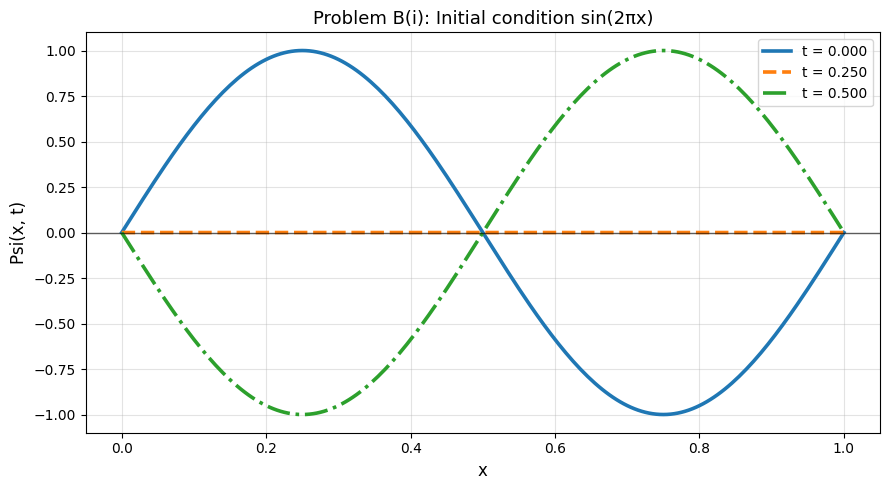

In [5]:
# Problem B(i): 
t_end = 1.0
sample_times = np.array([0.0, 0.25, 0.50])

u0_i = initial_condition_i(x)
t_i, U_i = wave_solver(u0_i, t_end=t_end)
plot_snapshots(x, t_i, U_i, sample_times, "Problem B(i): Initial condition sin(2πx)")

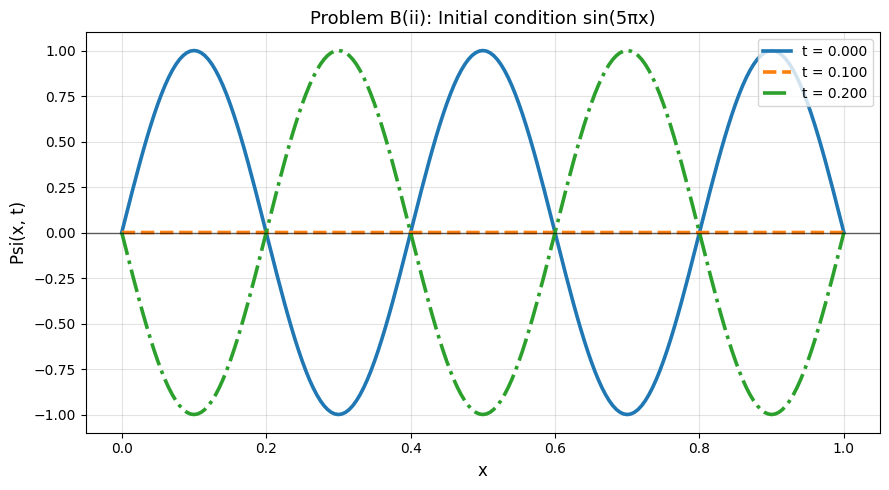

In [6]:
# Problem B(ii)
t_end = 1.0
sample_times = np.array([0.0, 0.10, 0.20])

u0_ii = initial_condition_ii(x)
t_ii, U_ii = wave_solver(u0_ii, t_end=t_end)
plot_snapshots(x, t_ii, U_ii, sample_times, "Problem B(ii): Initial condition sin(5πx)")

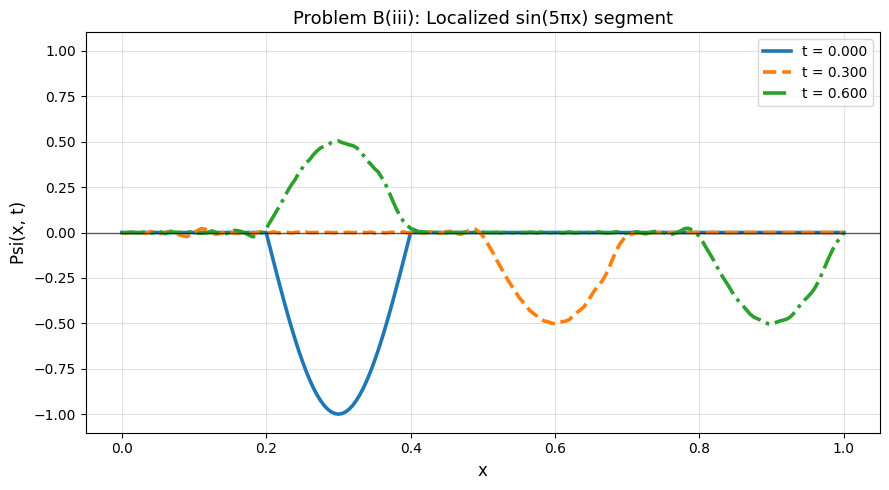

In [7]:
#  B(iii): 
t_end = 1.0
sample_times = np.array([0.0, 0.30, 0.60])

u0_iii = initial_condition_iii(x)
t_iii, U_iii = wave_solver(u0_iii, t_end=t_end)
plot_snapshots(x, t_iii, U_iii, sample_times, "Problem B(iii): Localized sin(5πx) segment")